# Using EcoFOCIpy to process raw field data

## Modified Routines to Archive Manually QC'd SUNA data created by C. Mordy

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import yaml
import pandas as pd

import EcoFOCIpy.io.ncCFsave as ncCFsave
import EcoFOCIpy.metaconfig.load_config as load_config

The sample_data_dir should be included in the github package but may not be included in the pip install of the package

## Simple Processing - first step

In [42]:
sample_data_dir = '/Users/bell/Programs/EcoFOCIpy/'
user_data_dir = '/Users/bell/ecoraid/2021/Moorings/21bsm2a/'

In [43]:
###############################################################
# edit to point to {instrument sepcific} raw datafile 
datafile = user_data_dir+'working/Mordy_Working/21BSM2a_0024m Final SUNA.xlsx'
instrument = 'SUNA 1471'
mooring_meta_file = user_data_dir+'logs/21BSM-2A.yaml'
inst_meta_file = sample_data_dir+'staticdata/instr_metaconfig/suna_cf.yaml'
institution_meta_file = sample_data_dir+'staticdata/institutional_meta_example.yaml' #include uaf?
inst_shortname = 'suna'
###############################################################

#init and load data
suna_wop_data = pd.read_excel(datafile,index_col='Date Time')

In [44]:
suna_wop_data

,Final SUNA NO3 (uM),Preliminary Temperature - DO NOT SHARE,Preliminary Salinity - DO NOT SHARE,Chl Fl,Unnamed: 5,Unnamed: 6,Cruise,Station,Date Time.1,Depth,Nut ID,CTD NO3,Unnamed: 13,Unnamed: 14,Unnamed: 15
Date Time,,,,,,,,,,,,,,,
2021-05-05 22:00:00,13.559750,NaN,NaN,NaN,NaN,NaN,DY2103,6.0,2021-05-06 16:26:00,30.0,42.0,15.070,NaN,NaN,
2021-05-05 23:00:00,13.930750,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2021-05-07 04:03:00,20.0,51.0,14.895,NaN,NaN,NaN
2021-05-06 00:00:00,14.061750,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2021-05-07 04:03:00,30.0,50.0,13.230,NaN,NaN,NaN
2021-05-06 01:00:00,14.346528,2.5667,32.1778,0.954615,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-06 02:00:00,13.949750,2.5711,32.1765,0.945645,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23 11:00:00,11.262083,6.2602,31.8635,0.930465,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23 13:00:00,11.545893,6.2714,31.8613,0.920460,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23 14:00:00,11.390750,6.2921,31.8730,0.903210,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

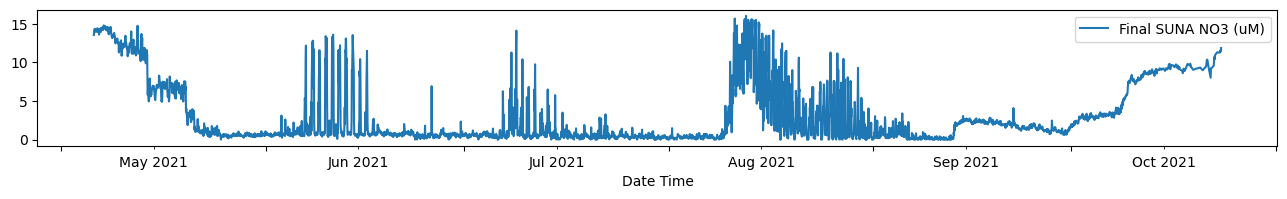

In [45]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
# copy is in the notebook examples
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(16, 2))
suna_wop_data[['Final SUNA NO3 (uM)']].plot(ax=ax)

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)



## Add Deployment meta information

Two methods are available (if comming from python2 world - ordereddict was important... in py38 a dictionary is inherently ordered)

In [46]:
#just a dictionary of dictionaries - simple
with open(mooring_meta_file) as file:
    mooring_config = yaml.full_load(file)

In [47]:
mooring_config['Instrumentation'][instrument]

{'InstType': 'SUNA',
 'SerialNo': '1471',
 'DesignedDepth': 24.5,
 'ActualDepth': 24.5,
 'PreDeploymentNotes': 'Plug in b/f deployment',
 'PostDeploymentNotes': '',
 'Deployed': 'y',
 'Recovered': 'y'}

## Add Instrument meta information

Time, depth, lat, lon should be added regardless (always our coordinates) but for a mooring site its going to be a (1,1,1,t) dataset
The variables of interest should be read from the data file and matched to a key for naming.  That key is in the inst_config file seen below and should represent common conversion names in the raw data

In [48]:
#just a dictionary of dictionaries - simple
with open(institution_meta_file) as file:
    institution_config = yaml.full_load(file)

In [49]:
with open(inst_meta_file) as file:
    inst_config = yaml.full_load(file)
inst_config

{'time': {'epic_key': 'TIM_601',
  'name': 'time',
  'generic_name': 'time',
  'standard_name': 'time',
  'long_name': 'date and time since reference time'},
 'depth': {'epic_key': 'D_3',
  'generic_name': 'depth',
  'units': 'meter',
  'long_name': 'depth below surface (meters)',
  'standard_name': 'depth',
  'positive': 'down'},
 'latitude': {'epic_key': 'LON_501',
  'name': 'latitude',
  'generic_name': 'latitude',
  'units': 'degrees_north',
  'long_name': 'latitude',
  'standard_name': 'latitude'},
 'longitude': {'epic_key': 'LAT_500',
  'name': 'longitude',
  'generic_name': 'longitude',
  'units': 'degrees_east',
  'long_name': 'longitude',
  'standard_name': 'longitude'},
 'timeseries_id': {'cf_role': 'timeseries_id',
  'long_name': 'timeseries id',
  'standard_name': ''},
 'temperature': {'epic_key': 'T_20',
  'generic_name': 'temp',
  'long_name': 'Sea temperature in-situ ITS-90 scale',
  'standard_name': 'sea_water_temperature',
  'units': 'degree_C'},
 'nitrate': {'epic_key

In [50]:
suna_wop_data.index = suna_wop_data.index.rename('date_time')

In [51]:
#sbe16 data uses header info to name variables... but we want standard names from the dictionary I've created, so we need to rename column variables appropriately
#rename values to appropriate names, if a value isn't in the .yaml file, you can add it
suna_wop_data = suna_wop_data.rename(columns={'Final SUNA NO3 (uM)':'nitrate'})
suna_wop_data.sample()

,nitrate,Preliminary Temperature - DO NOT SHARE,Preliminary Salinity - DO NOT SHARE,Chl Fl,Unnamed: 5,Unnamed: 6,Cruise,Station,Date Time.1,Depth,Nut ID,CTD NO3,Unnamed: 13,Unnamed: 14,Unnamed: 15
date_time,,,,,,,,,,,,,,,
2021-10-19 03:00:00,9.43575,6.6039,31.891,1.114005,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Add meta data and prelim processing based on meta data
# Convert to xarray and add meta information - save as CF netcdf file
# pass -> data, instmeta, depmeta
suna_wop_nc = ncCFsave.EcoFOCI_CFnc(df=suna_wop_data, 
                                instrument_yaml=inst_config, 
                                operation_yaml=mooring_config,
                                operation_type='mooring', 
                                instrument_id=instrument, 
                                inst_shortname=inst_shortname)
suna_wop_nc

At this point, you could save your file with the `.xarray2netcdf_save()` method and have a functioning dataset.... but it would be very simple with no additional qc, meta-data, or tuned parameters for optimizing software like ferret or erddap.

In [53]:
# expand the dimensions and coordinate variables
# renames them appropriatley and prepares them for meta-filled values
suna_wop_nc.expand_dimensions()

In [55]:
suna_wop_nc.variable_meta_data(variable_keys=list(suna_wop_data.columns.values),drop_missing=True)
suna_wop_nc.temporal_geospatioal_meta_data(depth='actual')
#adding dimension meta needs to come after updating the dimension values... BUG?
suna_wop_nc.dimension_meta_data(variable_keys=['depth','latitude','longitude'])

The following steps can happen in just about any order and are all meta-data driven.  Therefore, they are not required to have a functioning dataset, but they are required to have a well described dataset

In [56]:
#add global attributes
suna_wop_nc.deployment_meta_add()
suna_wop_nc.get_xdf()

#add instituitonal global attributes
suna_wop_nc.institution_meta_add(institution_yaml=institution_config)

#add instrument global attributes
suna_wop_nc.instrument_meta_data()

#add creation date/time - provenance data
suna_wop_nc.provinance_meta_add()

#provide intial qc status field
suna_wop_nc.qc_status(qc_status='unknown')


## Save CF Netcdf files

Currently stick to netcdf3 classic... but migrating to netcdf4 (default) may be no problems for most modern purposes.  Its easy enough to pass the `format` kwargs through to the netcdf api of xarray.

In [57]:
# combine trim (not mandatory) and filename together (saves to test.nc without name)

depth = str(int(mooring_config['Instrumentation'][instrument]['ActualDepth'])).zfill(4)
# mooring_yaml['Instrumentation'][self.instrument_id]['DesignedDepth'])).zfill(4) #<-- alternative
filename = "".join(mooring_config['MooringID'].split('-')).lower()+'_'+inst_shortname+'_'+depth+'m.nc'
suna_wop_nc.xarray2netcdf_save(xdf = suna_wop_nc.autotrim_time(),
                           filename=filename,format="NETCDF3_CLASSIC")

# don't trim the data and pass your own filename
# suna_wop_nc.xarray2netcdf_save(xdf = sbe56_wop_nc.get_xdf(),
#                            filename=filename,format="NETCDF4_CLASSIC")

/Users/bell/src/ecofocipy/src/EcoFOCIpy/io/ncCFsave.py:320: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 1900-01-01'. Resolution of 'hours' needed. Serializing times to floating point instead. Set encoding['dtype'] to integer dtype to serialize to int64. Set encoding['dtype'] to floating point dtype to silence this warning.
  xdf.to_netcdf(filename,format=kwargs['format'],encoding={'time':{'units':'days since 1900-01-01'}})


<Figure size 640x480 with 0 Axes>

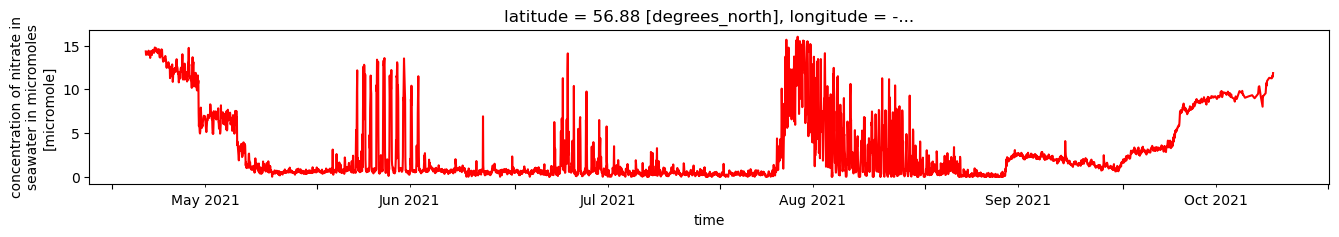

In [58]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
# copy is in the notebook examples
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(16, 2))
suna_wop_nc.autotrim_time().nitrate.plot(ax=ax,color='r')

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

In [59]:
#csvoutput if necessary
(suna_wop_nc.get_xdf().to_dataframe()).to_csv(filename.replace('nc','csv'))

## Next Steps

QC of data (plot parameters with other instruments)
- be sure to updated the qc_status and the history